# Adm No: 2222291
# Name: Toh Kien Yu

## Regression Model

In [30]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading|

In [31]:
df = pd.read_csv('datasets/housing_dataset.csv')
df.head(5)

,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status,Price ($)
0,0,Chicago,742.0,4,2,3,furnished,1330000
1,1,Denver,896.0,4,4,4,furnished,1225000
2,2,Chicago,996.0,3,2,2,semi-furnished,1225000
3,3,Seattle,750.0,4,2,2,furnished,1221500
4,4,New York,742.0,4,1,2,furnished,1141000


In [32]:
print("Database Shape")
print(df.shape)

Database Shape
(545, 8)


### Data Exploration

In [33]:
df.describe()

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.00000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,272.00000,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,157.47222,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,0.00000,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,136.00000,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,272.00000,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,408.00000,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,544.00000,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   House ID           545 non-null    int64  
 1   City               545 non-null    object 
 2   House Area (sqm)   545 non-null    float64
 3   No. of Bedrooms    545 non-null    int64  
 4   No. of Toilets     545 non-null    int64  
 5   Stories            545 non-null    int64  
 6   Renovation Status  545 non-null    object 
 7   Price ($)          545 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 34.2+ KB


In [35]:
df.isnull().sum() # No Null Values

House ID             0
City                 0
House Area (sqm)     0
No. of Bedrooms      0
No. of Toilets       0
Stories              0
Renovation Status    0
Price ($)            0
dtype: int64

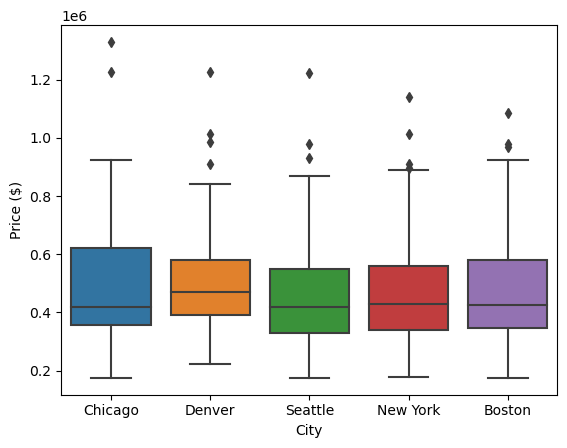

In [36]:
sns.boxplot(data=df,x = 'City', y ='Price ($)')
plt.show()

### Median housing prices are around the same price with Denver having the highest median housing price.

<Axes: xlabel='No. of Bedrooms', ylabel='Price ($)'>

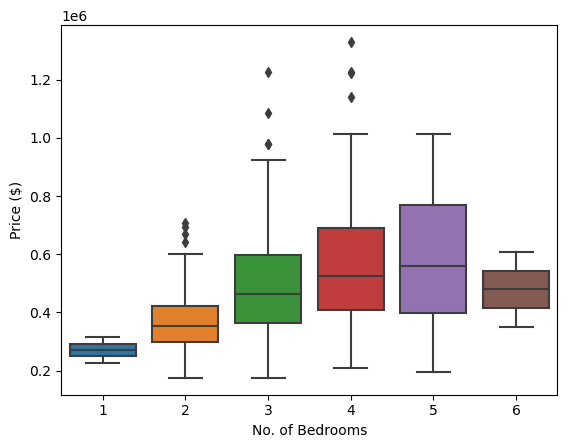

In [37]:
sns.boxplot(data=df,x = 'No. of Bedrooms', y ='Price ($)')

### Median housing prices increases as the number of bedrooms increase, until 6 number of bedrooms

<Axes: xlabel='No. of Toilets', ylabel='Price ($)'>

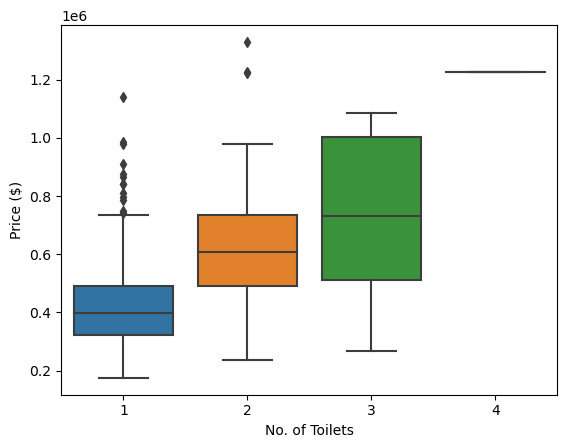

In [38]:
sns.boxplot(data=df,x = 'No. of Toilets', y ='Price ($)')

### Housing price increases as no. of toilet in the house increase

<Axes: xlabel='Renovation Status', ylabel='Price ($)'>

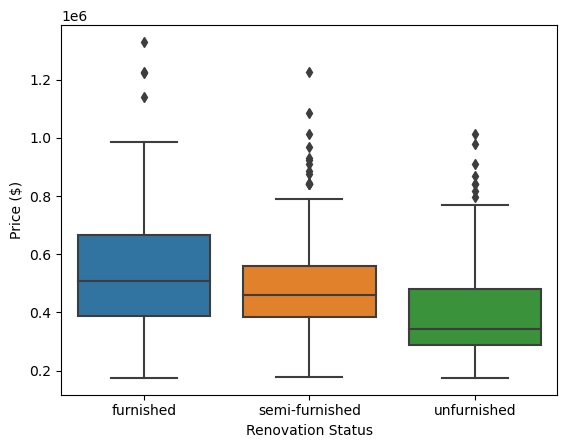

In [39]:
sns.boxplot(data=df,x = 'Renovation Status', y ='Price ($)')

### Median housing price for furnished is typically the highest, followed by semi-furnished then unfurnished

<Axes: xlabel='Stories', ylabel='Price ($)'>

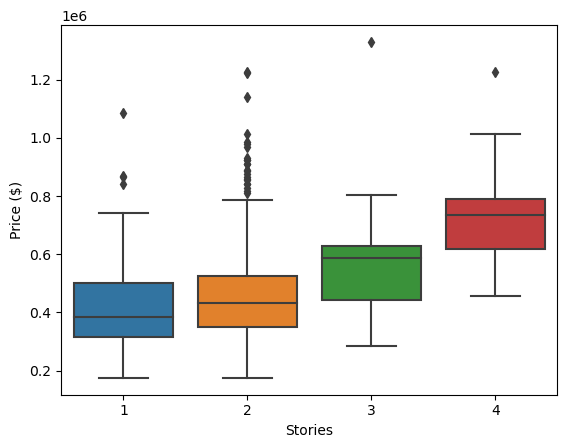

In [40]:
sns.boxplot(data=df,x ='Stories', y ='Price ($)')

### Median housing prices increases as the number of stories in the house increases

## Data Preprocessing and Feature Engineering

### - Price Per Square Meter column was created to increase the predictive power of the algorithm.

In [41]:
hDF = df.copy()

#Feature Engineering
hDF['Price Per Sqm'] = hDF['Price ($)'] / hDF['House Area (sqm)']

#Encode Categorical Variable
hDF = pd.get_dummies(hDF, columns = ['City','Renovation Status'],drop_first=True)
hDF

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($),Price Per Sqm,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_semi-furnished,Renovation Status_unfurnished
0,0,742.0,4,2,3,1330000,1792.452830,1,0,0,0,0,0
1,1,896.0,4,4,4,1225000,1367.187500,0,1,0,0,0,0
2,2,996.0,3,2,2,1225000,1229.919679,1,0,0,0,1,0
3,3,750.0,4,2,2,1221500,1628.666667,0,0,0,1,0,0
4,4,742.0,4,1,2,1141000,1537.735849,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,300.0,2,1,1,182000,606.666667,0,0,0,1,0,1
541,541,240.0,3,1,1,176715,736.312500,0,0,1,0,1,0
542,542,362.0,2,1,1,175000,483.425414,0,0,0,0,0,1
543,543,291.0,3,1,1,175000,601.374570,0,0,0,1,0,0


### X drops the target variable (‘Price') and identifying column (‘House ID’).<br>y is the target variable (‘Price’)<br>y is the housing price

In [42]:
X = hDF.drop(['Price ($)','House ID'], axis = 1)
y = hDF['Price ($)']

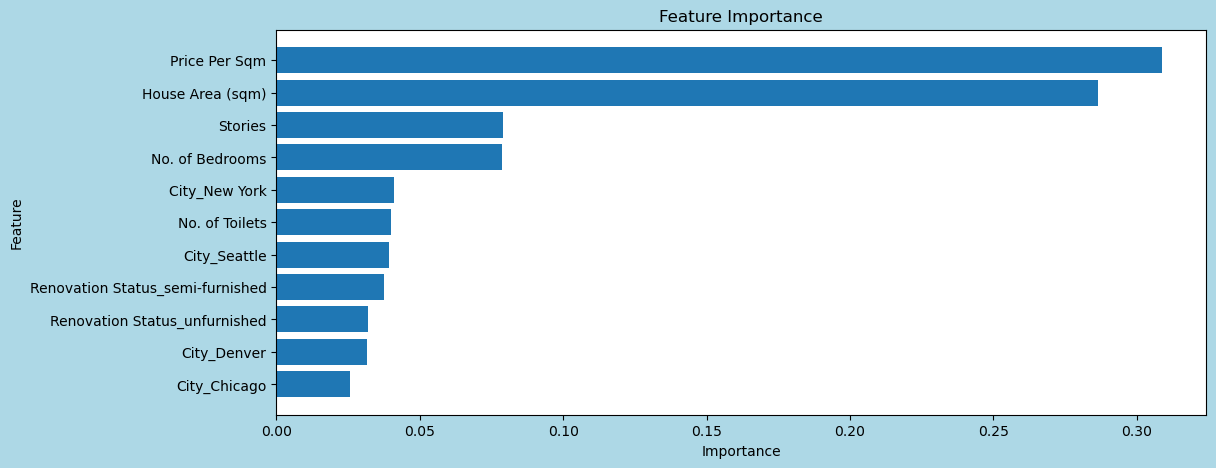

In [43]:
#Feature Importance Ranking
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X,y)
featureImportance = pd.DataFrame({'Feature': X.columns, 'Importance':randomForest.feature_importances_})
featureImportance = featureImportance.sort_values('Importance',ascending=True)

#Plotting the graph
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot()
fig.set_facecolor("lightblue")
ax1.set_title("Feature Importance")
ax1.set_xlabel("Importance")
ax1.set_ylabel("Feature")
ax1.barh(featureImportance['Feature'], featureImportance['Importance'])
plt.show()

### From the Feature Importance Graph, the model heavily relies on the price per sqm and house area to predict housing prices.<br><br>1. Houses with higher price per square meter will be costlier.<br><br>2. Houses with bigger house area will be costlier

## Modelling

### An 80:20 ratio between training and test data is chosen where 80% of the data is for training and 20% is for testing.

In [44]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=32)

### Algorithms Used: <br><br>1. Linear Regression<br>2. Random Forest Regressor<br>3. Gradient Boosting Regressor<br>4. HistGradientBoosting Regressor<br>5. Decision Tree Regressor<br>6. Extra Tree Regressor<br><br><u>Linear Regression</u><br><br>- Predict continuous variable<br>- Easy to implement<br>- Handles overfitting well<br><br><u>Random Forest Regressor</u><br><br>- A Random Forest Regressor<br>- Easy to interpret<br>- Lots of flexibility,many options to choose from when hyperparameter tuning<br><br><u>Gradient Boosting Regressor</u><br><br> - Gradient Boosting for Regressor- Lots of flexibility, many options to choose from when hyperparameter tuning<br><br><u>HistGradientBoosting Regressor</u><br><br>- Is a Histogram-based Gradient Boosting Regression Tree<br><br><u>Decision Tree Regressor</u><br><br>- Tree with decision nodes<br>- Not easily affected by outlier<br><br><u>Extra TreeRegressor</u><br><br>- Creates many decision trees and sampling of trees is random.<br>- Reduction in bias


## Test and Score Before Hyperparameter tuning

In [51]:
#Accuracy using test data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

clfs =[('Linear_Regression', LinearRegression()),
      ('Random_Forest',RandomForestRegressor()),
      ('Gradient_Boosting',GradientBoostingRegressor()),
      ('HGB',HistGradientBoostingRegressor()),
      ('Decision_Tree', DecisionTreeRegressor()),
      ('Extra_Trees',ExtraTreesRegressor())]

for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'The R Square score for {name}: {r2:.3f}')

The R Square score for Linear_Regression: 0.820
The R Square score for Random_Forest: 0.978
The R Square score for Gradient_Boosting: 0.984
The R Square score for HGB: 0.978
The R Square score for Decision_Tree: 0.954
The R Square score for Extra_Trees: 0.951


In [52]:
# Accuracy using cross validation
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits=6, shuffle=True, random_state=32)
for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    cv_results = cross_val_score(pipeline,X_train,y_train,cv=kf)
    print(f'The cv score for {name}: {np.mean(cv_results):.3f}')    

The cv score for Linear_Regression: 0.806
The cv score for Random_Forest: 0.935
The cv score for Gradient_Boosting: 0.953
The cv score for HGB: 0.928
The cv score for Decision_Tree: 0.919
The cv score for Extra_Trees: 0.884


In [53]:
#Classification Report
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pipelines = []
scores_df = pd.DataFrame(columns = ['Model','MSE', 'RMSE', 'MAE', 'MAPE','R2'])

for clf_name,clf in clfs:
    pipeline = Pipeline(steps = [ ('scalor',StandardScaler()),('classifier',clf)])    
    pipeline.fit(X_train,y_train)
    pipelines.append(pipeline)
    y_pred = pipeline.predict(X_test)
    
    new_row = {'Model': clf_name,
              'MSE': metrics.mean_squared_error(y_test, y_pred, squared=True),
              'RMSE': metrics.mean_squared_error(y_test, y_pred, squared=False),
              'MAE': metrics.mean_absolute_error(y_test, y_pred),
              'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred),
              'R2': metrics.r2_score(y_test, y_pred)}
    scores_df = pd.concat([scores_df,pd.DataFrame([new_row])],ignore_index=True)
    
print(scores_df)

               Model           MSE          RMSE           MAE      MAPE  \
0  Linear_Regression  6.111275e+09  78174.643038  54201.740410  0.115976   
1      Random_Forest  7.106823e+08  26658.625792  16915.990000  0.035986   
2  Gradient_Boosting  5.620806e+08  23708.239355  16536.399862  0.034849   
3                HGB  7.326818e+08  27068.095468  18351.843317  0.038735   
4      Decision_Tree  1.845824e+09  42963.057615  27585.266055  0.057524   
5        Extra_Trees  1.680763e+09  40997.112317  26514.919817  0.055393   

         R2  
0  0.820208  
1  0.979092  
2  0.983464  
3  0.978445  
4  0.945696  
5  0.950552  


### From the test and score results, all models achieve a very high R square score of 0.90+ except for linear regression with a R Square score of 0.80+.<br><br>Gradient Boosting Algorithm has a highest R Square of 0.984 tested on test data compared to the other algorithms.  This tells us that the model  able to explain 98% of the variance whether one will default payment.<br><br>Not only that, it also has the highest cross-validation score of 0.952

## Hypertuning models

### Picked out 3 of the most accurate model to hyperparameter tune.<br><br>1. Gradient Boosting<br>2. Random Forest<br>3. HistGradientBoosting<br><br>Now, I will hyperparameter tune the model to further improve the accuracy by customising the parameters for the algorithm.<br><br>1. Define a param grid for each model, and parameters I would like to test<br>2. GridSearchCV will loop through all the different types of combinations.<br>3. Upon looping through all the combinations, it will provide me with the best parameter combinations and highest R Square Score obtained.

In [26]:
#Hypertuning Gradient Boosting
from sklearn.model_selection import GridSearchCV, KFold
gradient = GradientBoostingRegressor()
parameters = {'n_estimators': [100,500,1000], 'learning_rate':[0.01,0.1,1],'max_depth':[3,5,None]}
grid = GridSearchCV(gradient, param_grid=parameters, cv=5)
best_clf = grid.fit(X_train,y_train)
print("score = %3.3f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.989
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}


In [27]:
#Hypertuning Random Forest
from sklearn.model_selection import GridSearchCV, KFold
randomForest = RandomForestRegressor()
parameters = {'n_estimators': [100,500,1000],'max_depth':[None,5,10],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
grid = GridSearchCV(randomForest, param_grid=parameters, cv=5)
best_clf = grid.fit(X_train,y_train)
print("score = %3.3f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.978
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [28]:
#Hypertuning HistGradientBoosting
from sklearn.model_selection import GridSearchCV, KFold
hgb = HistGradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.1,1],'max_depth':[None,3,5],'max_leaf_nodes':[None,10,10],'min_samples_leaf':[1,2,4]}
grid = GridSearchCV(hgb, param_grid=parameters, cv=5)
best_clf = grid.fit(X_train,y_train)
print("score = %3.3f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.986
{'learning_rate': 0.1, 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2}


## Scores After Hyperparameter Tuning

In [54]:
#Accuracy using test data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor

clfs =[('Linear_Regression', LinearRegression()),
      ('Random_Forest',RandomForestRegressor(max_depth = 10,min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)),
      ('Gradient_Boosting',GradientBoostingRegressor(n_estimators = 1000,max_depth = 3,learning_rate = 0.1)),
      ('HGB',HistGradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, max_leaf_nodes = 10, min_samples_leaf = 2)),
      ('Decision_Tree', DecisionTreeRegressor()),
      ('Extra_Trees',ExtraTreesRegressor())]

for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'The R Square score for {name}: {r2:.3f}')

The R Square score for Linear_Regression: 0.820
The R Square score for Random_Forest: 0.981
The R Square score for Gradient_Boosting: 0.990
The R Square score for HGB: 0.986
The R Square score for Decision_Tree: 0.947
The R Square score for Extra_Trees: 0.951


In [55]:
# Accuracy using cross validation
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits=6, shuffle=True, random_state=32)
for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    cv_results = cross_val_score(pipeline,X_train,y_train,cv=kf)
    print(f'The cv score for {name}: {np.mean(cv_results):.3f}')    

The cv score for Linear_Regression: 0.806
The cv score for Random_Forest: 0.936
The cv score for Gradient_Boosting: 0.962
The cv score for HGB: 0.955
The cv score for Decision_Tree: 0.925
The cv score for Extra_Trees: 0.886


In [56]:
#Classification Report
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pipelines = []
scores_df = pd.DataFrame(columns = ['Model','MSE', 'RMSE', 'MAE', 'MAPE','R2'])

for clf_name,clf in clfs:
    pipeline = Pipeline(steps = [ ('scalor',StandardScaler()),('classifier',clf)])    
    pipeline.fit(X_train,y_train)
    pipelines.append(pipeline)
    y_pred = pipeline.predict(X_test)
    
    new_row = {'Model': clf_name,
              'MSE': metrics.mean_squared_error(y_test, y_pred, squared=True),
              'RMSE': metrics.mean_squared_error(y_test, y_pred, squared=False),
              'MAE': metrics.mean_absolute_error(y_test, y_pred),
              'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred),
              'R2': metrics.r2_score(y_test, y_pred)}
    scores_df = pd.concat([scores_df,pd.DataFrame([new_row])],ignore_index=True)
    
print(scores_df)

               Model           MSE          RMSE           MAE      MAPE  \
0  Linear_Regression  6.111275e+09  78174.643038  54201.740410  0.115976   
1      Random_Forest  7.264910e+08  26953.497801  17339.984523  0.036691   
2  Gradient_Boosting  3.426247e+08  18510.123272  12943.095043  0.027804   
3                HGB  4.845257e+08  22011.944571  15603.954105  0.032334   
4      Decision_Tree  2.227002e+09  47191.118596  28831.651376  0.058074   
5        Extra_Trees  1.664111e+09  40793.519253  25744.743211  0.053255   

         R2  
0  0.820208  
1  0.978627  
2  0.989920  
3  0.985745  
4  0.934482  
5  0.951042  


### After tuning the models,<br><br><u>Gradient Boosting</u><br><br>R Square Score on test data increased from 0.984 to 0.990.<br>Cross Validation Score increased from 0.952 to 0.962.<br><br><u>Random Forest</u><br><br>R Square Score on test data is the same 0.981.<br>Cross Validation Score increased from 0.935 to 0.936.<br><br><u>Histogram Gradient Boosting</u><br><br>R Square Score on test data increased from 0.978 to 0.986.<br>Cross Validation Score increased from 0.928 to 0.955.<br><br>The MSE Score is  of Gradient Boosting is the lowest.<br>The MAPE Score of Gradient Boosting is the lowest which tells us that on average, the model prediction differ by 2.7% from the actual value of housing prices.<br><br>Overall, hyperparameter tuning has increased our model R Square Score in turn makes the model effective.

## Dummy Baseline

In [57]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics
dummyCLF = DummyRegressor(strategy='mean')
dummyCLF.fit(X_train,y_train)
y_pred = dummyCLF.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred, squared=True)
print(f'Dummy Baseline MSE: {mse}')

Dummy Baseline MSE: 34007944483.006145


### Comparing my model to a dummy baseline, the Mean Square Error has decreased, and my Model’s R Square Score increased.<br><br>My model is able to capture complex patterns in the data and make more accurate predictions about housing prices.

## Conclusion

### In Conclusion, this dataset has given me a deep understanding on the housing price in US.<br><br>Upon considering all 3 different accuracy reports Gradient Boosting is my most accurate model to predict housing prices.